# 1. Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. Import data

In [2]:
df=pd.read_csv('Cleaned_loan_data_file.csv')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(538, 12)

# 3. Exploratory Data Analysis

## Categorical Columns

##### 3.1 The below graph depicts the role played by gender in getting the loan approval.

Text(0.5, 1.0, 'Gender & Loan Status')

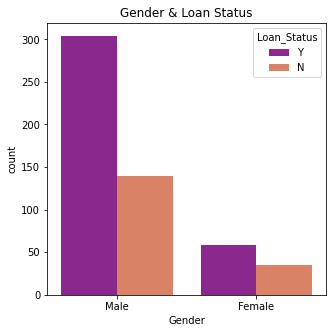

In [4]:
plt.figure(figsize=(5,5))
sb.countplot(data=df,x='Gender',hue='Loan_Status',palette ='plasma')
plt.title('Gender & Loan Status')

##### 3.2 The below graph depicts that married person have more chances of getting a loan approval.

Text(0.5, 1.0, 'Married & Loan Status')

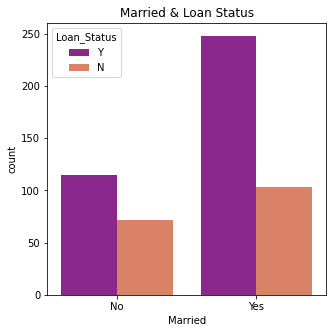

In [5]:
plt.figure(figsize=(5,5))
sb.countplot(data=df,x='Married',hue='Loan_Status',palette ='plasma')
plt.title('Married & Loan Status')

##### 3.3 The below graph depicts that self employed person have very less chances of getting a loan approval.

Text(0.5, 1.0, 'Self_Employed & Loan Status')

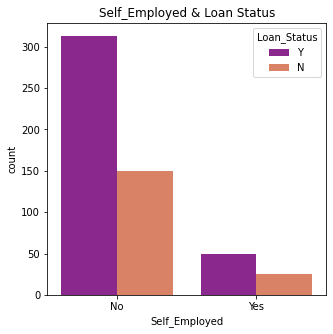

In [6]:
plt.figure(figsize=(5,5))
sb.countplot(data=df,x='Self_Employed',hue='Loan_Status',palette ='plasma')
plt.title('Self_Employed & Loan Status')

##### 3.4 The below graph depicts that max approval rate comes from Semiurban property area while the max disapproval rate comes from Urban area.

Text(0.5, 1.0, 'Property_Area & Loan Status')

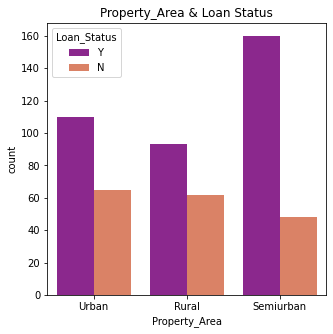

In [7]:
plt.figure(figsize=(5,5))
sb.countplot(data=df,x='Property_Area',hue='Loan_Status',palette ='plasma')
plt.title('Property_Area & Loan Status')

##### 3.5 The below graph depicts a massive gap between a graduate and non- graduate getting a loan approval.

Text(0.5, 1.0, 'Education & Loan Status')

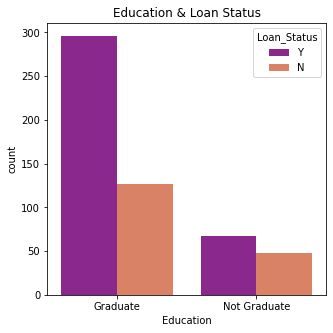

In [8]:
plt.figure(figsize=(5,5))
sb.countplot(data=df,x='Education',hue='Loan_Status',palette ='plasma')
plt.title('Education & Loan Status')

##### 3.6 The below graph depicts clearly the importance of having a credit history effects the loan approval status.

Text(0.5, 1.0, 'Credit_History & Loan Status')

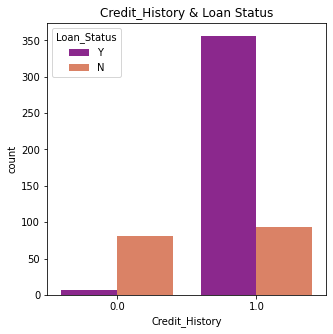

In [9]:
plt.figure(figsize=(5,5))
sb.countplot(data=df,x='Credit_History',hue='Loan_Status',palette ='plasma')
plt.title('Credit_History & Loan Status')

## Relational Columns

### Let's see how an applicant's income effects the loan status.

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

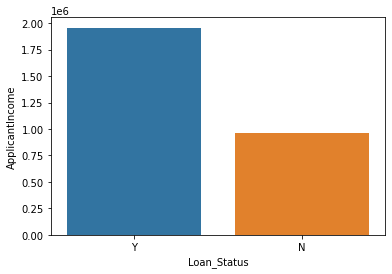

In [10]:
df.groupby(['Loan_Status'], as_index=False)['ApplicantIncome'].sum().sort_values(by='ApplicantIncome',ascending=False)
df_applicantincome = df.groupby(['Loan_Status'], as_index=False)['ApplicantIncome'].sum().sort_values(by='ApplicantIncome',ascending=False)
sb.barplot(data=df_applicantincome, x='Loan_Status',y='ApplicantIncome')

##### 3.7 The above graph depicts clearly that applicants having more income tends to be more applicable for getting loan approval.

### Let's see relation between the Loan Amount and Applicant, Coapplicant's income

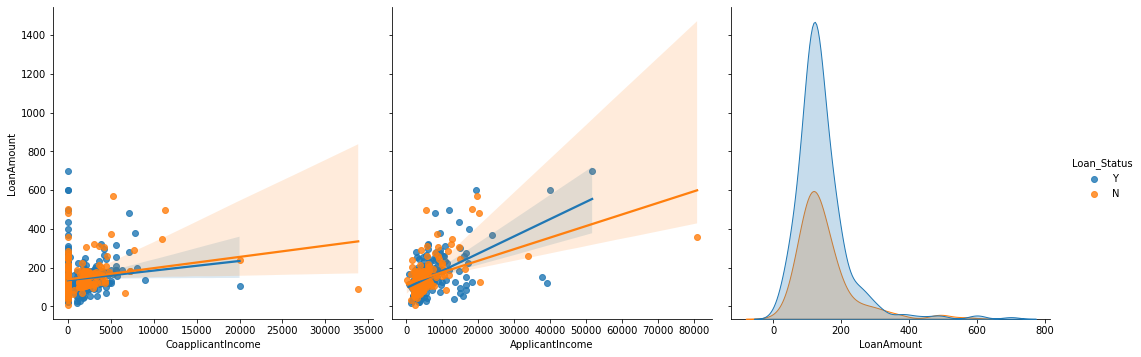

In [11]:
sb.pairplot(df, x_vars=['CoapplicantIncome', 'ApplicantIncome', 'LoanAmount'], y_vars='LoanAmount', size=5, hue='Loan_Status',aspect=1, kind='reg')

##### 3.8 The above graph depicts that upto a certain income level the loan amount increases proprtionally.

<Axes: xlabel='Self_Employed', ylabel='ApplicantIncome'>

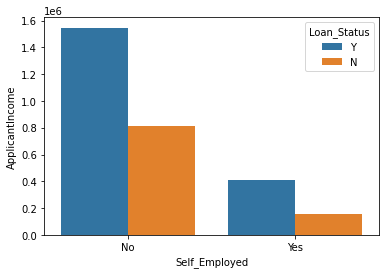

In [12]:
df_applicantincome = df.groupby(['Self_Employed','Loan_Status'], as_index=False)['ApplicantIncome'].sum().sort_values(by='ApplicantIncome',ascending=False)
sb.barplot(data=df_applicantincome, x='Self_Employed',y='ApplicantIncome',hue='Loan_Status')

##### 3.9 The above graph depicts that the applicant which is not self employed and have more income will have more chances of getting loan approval.

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

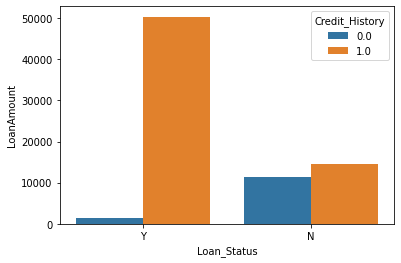

In [13]:
df_applicantincome = df.groupby(['Loan_Status','Credit_History'], as_index=False)['LoanAmount'].sum().sort_values(by='LoanAmount',ascending=False)
sb.barplot(data=df_applicantincome, x='Loan_Status',y='LoanAmount',hue='Credit_History')

##### 3.10 The above graph depicts that the applicant having a credit history and more likely to get approved for a loan of a higher amount than the applicant who do not have a credit history.

# 4. Data Pre-Processing

#### Since, the dataset is clean and EDA has been performed, it's time to prepare the dataset for model training

In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,0.784387,5432.211896,1541.438513,144.652416,342.331429,0.836431
std,1.014778,5885.545882,2517.250234,81.188288,64.067387,0.370228
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000
25%,0.000000,2896.250000,0.000000,101.250000,360.000000,1.000000
50%,0.000000,3858.500000,1062.000000,128.000000,360.000000,1.000000
75%,2.000000,5820.500000,2245.500000,165.000000,360.000000,1.000000
max,3.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000


### Since, there are categorical features present in the dataset, let's convert them into numeric before feeding it into ML algorithms

In [16]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [17]:
lb=LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
df['Married'] = lb.fit_transform(df['Married'])
df['Education'] = lb.fit_transform(df['Education'])
df['Self_Employed'] = lb.fit_transform(df['Self_Employed'])
df['Property_Area'] = lb.fit_transform(df['Property_Area'])

In [19]:
df['Loan_Status'] = lb.fit_transform(df['Loan_Status'])

Text(0.5, 1.0, 'Correlation between features')

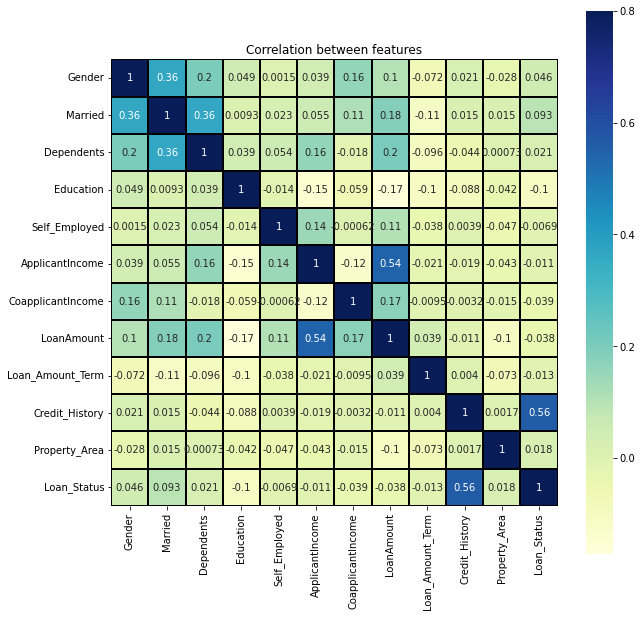

In [20]:
#correlation table
corr = df.corr()
plt.figure(figsize=(10,10))
sb.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [21]:
X= df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 2)

In [23]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
209,0,0,1,0,0,3812,0.0,112.0,360.0,1.0,0
280,1,1,2,0,0,3717,0.0,120.0,360.0,1.0,1
200,1,1,1,1,1,4735,0.0,138.0,360.0,1.0,2
40,1,1,0,0,0,5821,0.0,144.0,360.0,1.0,2
511,1,1,1,0,0,4283,3000.0,172.0,84.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
299,1,1,3,1,0,2647,1587.0,173.0,360.0,1.0,0
534,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
493,1,1,2,0,0,8799,0.0,258.0,360.0,0.0,2
527,1,0,0,0,0,3676,4301.0,172.0,360.0,1.0,0


# 5. Model Training using Decision Tree Algorithm

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt= DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

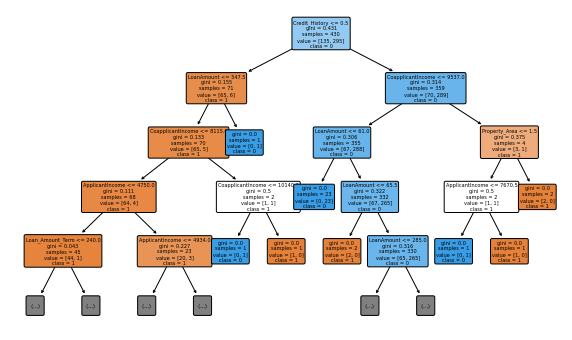

In [26]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plot_tree(dt, feature_names=X_train.columns.to_list(), class_names=Y_train.unique().astype(str), filled=True,fontsize=5, max_depth=4, impurity=True, rounded=True)
plt.show()


In [32]:
y_pred_test = dt.predict(X_test) 

In [33]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(Y_test,y_pred_test))

Accuracy score for test data is: 0.6759259259259259


In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, y_pred_test))

confusion_matrix.index = ['Actual Declined','Actual Approved']
confusion_matrix.columns = ['Predicted Declined','Predicted Approved']
print(confusion_matrix)

                 Predicted Declined  Predicted Approved
Actual Declined                  24                  16
Actual Approved                  19                  49


##### This means 24 + 49 = 73 correct predictions & 19 + 16 = 35 false predictions.

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58        40
           1       0.75      0.72      0.74        68

    accuracy                           0.68       108
   macro avg       0.66      0.66      0.66       108
weighted avg       0.68      0.68      0.68       108



# Let's see if we can find the best parameters to tune the decision tree classifier using GridSearch CV

# 6. Model Tuning using GridSearch CV

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the GridSearchCV object on the data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [39]:
print(best_params)

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [40]:
print(best_score)

0.8209302325581396


In [41]:
# Create a new instance of DecisionTreeClassifier with the best parameters
best_classifier = DecisionTreeClassifier(**best_params)

# Fit the best classifier on the training data
best_classifier.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=5)

In [42]:
y_predict = best_classifier.predict(X_test) 

In [43]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(Y_test,y_predict))

Accuracy score for test data is: 0.7314814814814815


In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, y_predict))

confusion_matrix.index = ['Actual Declined','Actual Approved']
confusion_matrix.columns = ['Predicted Declined','Predicted Approved']
print(confusion_matrix)

                 Predicted Declined  Predicted Approved
Actual Declined                  17                  23
Actual Approved                   6                  62


##### This means 17 + 62 = 79 correct predictions & 23 + 6 = 29 false predictions.

### Therefore, our decision tree classifier improved when the best parameters are found by GridSearch CV

# 7. Plotting Model Performance

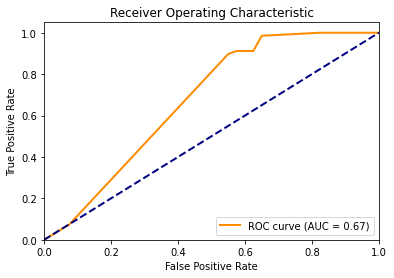

In [50]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
probas = best_classifier.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(Y_test, probas)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# 8. Saving the Model 

In [51]:
import pickle
pickle.dump(best_classifier,open('dec_tree_classifier.pkl','wb'))